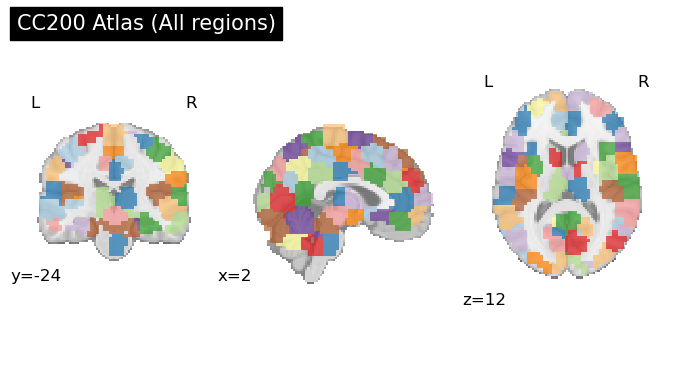

<Figure size 2400x1600 with 0 Axes>

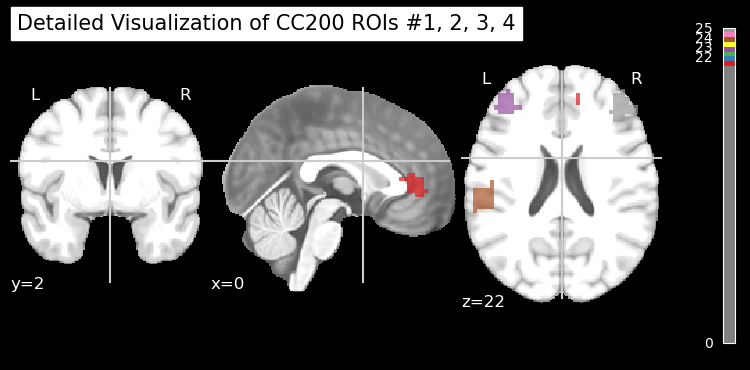

In [28]:
from nilearn import plotting, image
from nilearn.datasets import load_mni152_template
from nilearn.plotting import find_xyz_cut_coords
import numpy as np
import matplotlib.pyplot as plt

cut_coords = find_xyz_cut_coords(load_mni152_template())
# Load the CC200 atlas
atlas_filename = r'C:\ASD Data Science\ASD-Graph-Analysis\data\CC200.nii.gz'
atlas_img = image.load_img(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Visualize the full CC200 atlas clearly
plotting.plot_roi(atlas_filename, title='CC200 Atlas (All regions)',
                  draw_cross=False, cmap='Paired')

# To visualize specific ROIs (e.g., ROI #1, #2, and #3):
roi_number = 1  # adjust as desired

# Create a mask image clearly selecting these regions
atlas_img = image.load_img(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Mask out unwanted regions
mask = np.isin(atlas_data, roi_numbers_to_visualize)
masked_atlas_data = np.where(mask, atlas_data, 0)

# Create a new image from masked data
masked_img = image.new_img_like(atlas_img, masked_atlas_data)

plt.figure(figsize=(24,16))
# Visualize selected regions explicitly
display = plotting.plot_roi(
    masked_img,
    bg_img=load_mni152_template(),  # Background anatomical image
    title="Detailed Visualization of CC200 ROIs #1, 2, 3, 4",
    draw_cross=True,                         # Clearly shows coordinates
    annotate=True,                           # Adds left/right labels
    cmap='Set1',                             # Clear color map for distinction
    colorbar=True,                           # Adds colorbar clearly indicating ROI numbers
    display_mode='ortho',                    # Orthogonal (3D) view
    cut_coords=cut_coords,                    # Center coordinates (can adjust)
    dim=-0.5                                 # Adjust brightness clearly
)

plotting.show();


<Figure size 1000x800 with 0 Axes>

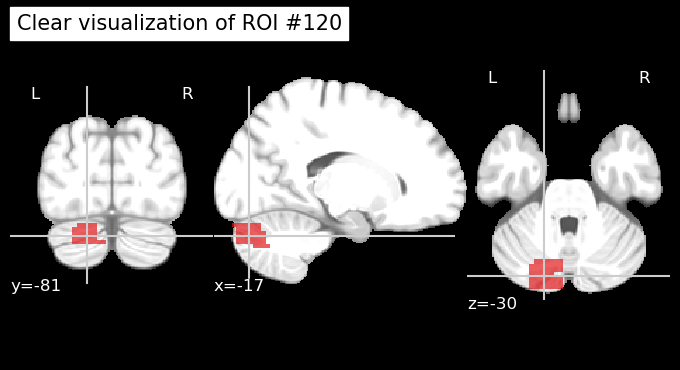

In [38]:
from nilearn import plotting, image
from nilearn.datasets import load_mni152_template
from nilearn.plotting import find_xyz_cut_coords
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.constrained_layout.use'] = True

# Load CC200 atlas
atlas_filename = r'C:\ASD Data Science\ASD-Graph-Analysis\data\CC200.nii.gz'
atlas_data = atlas_img.get_fdata()

# Just specify one ROI clearly at a time:
roi_number = 120  # Change explicitly for each ROI you want clearly

# Mask explicitly just one ROI
roi_mask = (atlas_data == roi_number)
masked_roi_data = np.where(roi_mask, atlas_data, 0)

# Create masked image explicitly
masked_img = image.new_img_like(atlas_img, masked_roi_data)

# Get optimal coordinates clearly for this single ROI
cut_coords = find_xyz_cut_coords(masked_img)

# Plot clearly with a larger figure
plt.figure(figsize=(10, 8))

plotting.plot_roi(
    masked_img,
    bg_img=load_mni152_template(),
    title=f"Clear visualization of ROI #{roi_number}",
    draw_cross=True,
    annotate=True,
    cmap='Set1',
    colorbar=False,
    display_mode='ortho',
    cut_coords=cut_coords,
    dim=-0.5
)

plt.show()
